# Effective Rank and Loss Evolution During Training

Visualization of how the effective rank of the Gram matrix and training loss change during training.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to data directory (relative to notebooks folder)
DATA_DIR = os.path.join(os.path.dirname(os.getcwd()), "data")

# Load results
with open(os.path.join(DATA_DIR, "DD_R32_D48_results_20251207_225705.json"), "r") as f:
    results = json.load(f)

print(f"Configuration:")
print(f"  Task rank: {results['rank']}")
print(f"  Network depth: {results['depth']}")
print(f"  Dimension: {results['dim']}")
print(f"  Samples: {results['n_samples']}")
print(f"  Total epochs: {results['epochs']}")

print(f"\nLoss Summary:")
print(f"  Baseline loss: {results['baseline_loss']:.4f}")
print(f"  Final loss: {results['best_final_loss']:.6e}")
print(f"  Improvement: {results['baseline_loss'] / results['best_final_loss']:.1f}x")

# Get loss history
exp = results["experiments"][0]
loss_history = exp["loss_history"]
loss_epochs = np.array([h[0] for h in loss_history])
losses = np.array([h[1] for h in loss_history])

# Find min loss
min_loss_idx = np.argmin(losses)
min_loss = losses[min_loss_idx]
min_loss_epoch = loss_epochs[min_loss_idx]
print(f"  Minimum loss: {min_loss:.6e} at epoch {min_loss_epoch}")

if "erank_history" in results:
    print(f"\nEffective Rank Summary:")
    print(f"  Initial: {results['initial_erank']:.4f}")
    print(f"  Final: {results['final_erank']:.4f}")
    print(f"  Change: {results['final_erank'] - results['initial_erank']:.4f}")
else:
    print("\nNo effective rank history found.")

Configuration:
  Task rank: 32
  Network depth: 48
  Dimension: 64
  Samples: 128
  Total epochs: 200000

Loss Summary:
  Baseline loss: 60.6350
  Final loss: 1.319520e-03
  Improvement: 45952.4x
  Minimum loss: 1.117551e-03 at epoch 199000

Effective Rank Summary:
  Initial: 1.0769
  Final: 3.6761
  Change: 2.5993


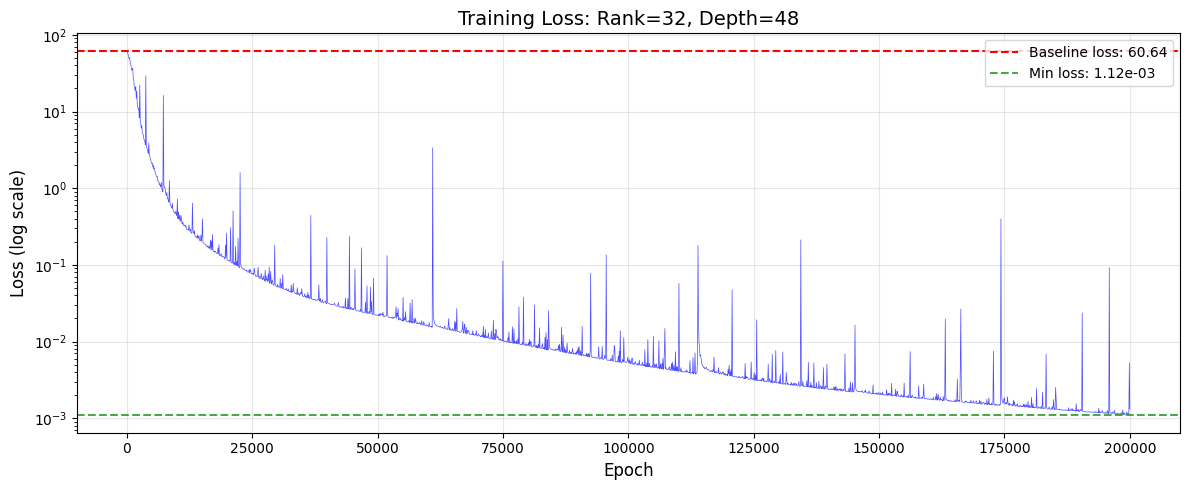

In [2]:
# Plot 1: Training Loss Over Epochs
fig, ax = plt.subplots(figsize=(12, 5))

ax.semilogy(loss_epochs, losses, "b-", alpha=0.7, linewidth=0.5)
ax.axhline(
    y=results["baseline_loss"],
    color="r",
    linestyle="--",
    label=f"Baseline loss: {results['baseline_loss']:.2f}",
)
ax.axhline(
    y=min_loss, color="g", linestyle="--", alpha=0.7, label=f"Min loss: {min_loss:.2e}"
)

ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Loss (log scale)", fontsize=12)
ax.set_title(
    f"Training Loss: Rank={results['rank']}, Depth={results['depth']}", fontsize=14
)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("loss_evolution.png", dpi=150)
plt.show()

/tmp/ipykernel_47540/3057805136.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


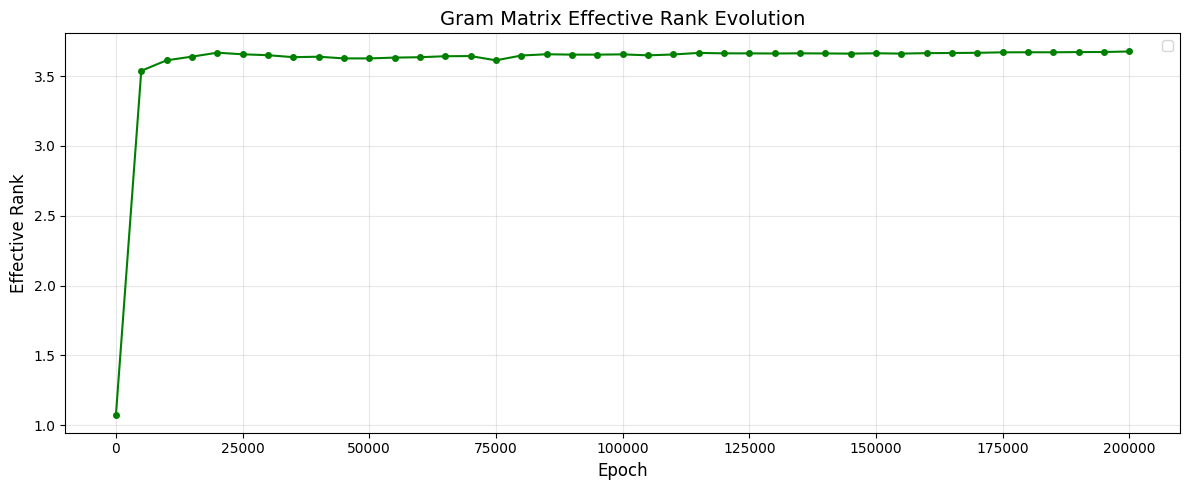


Effective rank range: 1.0769 - 3.6761
Standard deviation: 0.3977


In [22]:
# Plot 2: Effective Rank Over Epochs
if "erank_history" in results:
    erank_history = results["erank_history"]
    erank_epochs = np.array([h[0] for h in erank_history])
    eranks = np.array([h[1] for h in erank_history])

    fig, ax = plt.subplots(figsize=(12, 5))

    ax.plot(erank_epochs, eranks, "go-", markersize=4, linewidth=1.5)
    # ax.axhline(y=results['rank'], color='r', linestyle='--',
    #            label=f"Task rank: {results['rank']}")
    # ax.axhline(y=results['dim'], color='gray', linestyle=':', alpha=0.5,
    #            label=f"Max possible: {results['dim']}")

    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_ylabel("Effective Rank", fontsize=12)
    ax.set_title(f"Gram Matrix Effective Rank Evolution", fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Set y-axis to show full range for context
    # ax.set_ylim(0, max(results['rank'] + 5, max(eranks) + 2))

    plt.tight_layout()
    plt.savefig("erank_evolution.png", dpi=150)
    plt.show()

    print(f"\nEffective rank range: {min(eranks):.4f} - {max(eranks):.4f}")
    print(f"Standard deviation: {np.std(eranks):.4f}")
else:
    print("No effective rank history available.")

/tmp/ipykernel_47540/1577269454.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


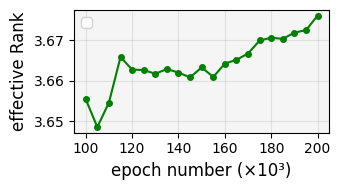


Effective rank range: 1.0769 - 3.6761
Standard deviation: 0.3977


In [ ]:
# Plot 2: Effective Rank Over Epochs
if "erank_history" in results:
    erank_history = results["erank_history"]
    erank_epochs = np.array([h[0] for h in erank_history])
    eranks = np.array([h[1] for h in erank_history])

    fig, ax = plt.subplots(figsize=(3.5, 2))
    ax.set_facecolor("#f5f5f5")

    n_skippedRanks = 20
    ax.plot(
        erank_epochs[n_skippedRanks:],
        eranks[n_skippedRanks:],
        "go-",
        markersize=4,
        linewidth=1.5,
    )
    # ax.axhline(y=results['rank'], color='r', linestyle='--',
    #            label=f"Task rank: {results['rank']}")
    # ax.axhline(y=results['dim'], color='gray', linestyle=':', alpha=0.5,
    #            label=f"Max possible: {results['dim']}")

    ax.set_xlabel("epoch number (×10³)", fontsize=12)
    ax.set_ylabel("effective Rank", fontsize=12)
    # ax.set_title(f"Gram Matrix Effective Rank Evolution", fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Set y-axis to show full range for context
    # ax.set_ylim(0, max(results['rank'] + 5, max(eranks) + 2))

    # Customize x-axis labels BEFORE showing the plot
    from matplotlib.ticker import FuncFormatter

    def format_epoch(x, pos):
        return f"{int(x / 1000)}"

    ax.xaxis.set_major_formatter(FuncFormatter(format_epoch))

    plt.tight_layout()
    plt.savefig("erank_evolution.png", dpi=150)
    plt.show()

    print(f"\nEffective rank range: {min(eranks):.4f} - {max(eranks):.4f}")
    print(f"Standard deviation: {np.std(eranks):.4f}")
else:
    print("No effective rank history available.")

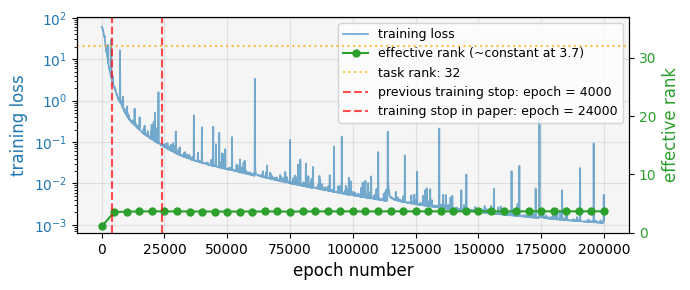

In [24]:
# Plot 3: Combined - Loss and Effective Rank (dual y-axis)
if "erank_history" in results:
    fig, ax1 = plt.subplots(figsize=(7, 3))
    ax1.set_facecolor("#f5f5f5")

    # Loss on left y-axis (log scale)
    color1 = "tab:blue"
    ax1.set_xlabel("epoch number", fontsize=12)
    ax1.set_ylabel("training loss", color=color1, fontsize=12)
    ax1.semilogy(
        loss_epochs,
        losses,
        color=color1,
        alpha=0.6,
        linewidth=1.3,
        label="training loss",
    )
    ax1.tick_params(axis="y", labelcolor=color1)
    # ax1.axhline(y=results['baseline_loss'], color='red', linestyle='--', alpha=0.5, label=f"Baseline: {results['baseline_loss']:.2f}")

    # Effective rank on right y-axis
    ax2 = ax1.twinx()
    color2 = "tab:green"
    ax2.set_ylabel("effective rank", color=color2, fontsize=12)
    ax2.plot(
        erank_epochs,
        eranks,
        color=color2,
        marker="o",
        markersize=5,
        linewidth=1.5,
        label="effective rank (~constant at 3.7)",
    )
    ax2.tick_params(axis="y", labelcolor=color2)
    ax2.axhline(
        y=results["rank"],
        color="orange",
        linestyle=":",
        alpha=0.7,
        label=f"task rank: {results['rank']}",
    )
    ax2.axvline(
        x=4000,
        color="red",
        linestyle="--",
        alpha=0.7,
        label="previous training stop: epoch = 4000",
    )
    ax2.axvline(
        x=24000,
        color="red",
        linestyle="--",
        alpha=0.7,
        label="training stop in paper: epoch = 24000",
    )
    ax2.set_ylim(0, results["rank"] + 5)

    # Combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

    # plt.title(f"Training Dynamics: Loss vs Effective Rank (Rank={results['rank']}, Depth={results['depth']})", fontsize=14)
    ax1.grid(True, alpha=0.3)

    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=9)

    plt.tight_layout()
    plt.savefig("loss_vs_erank.png", dpi=150)
    plt.show()

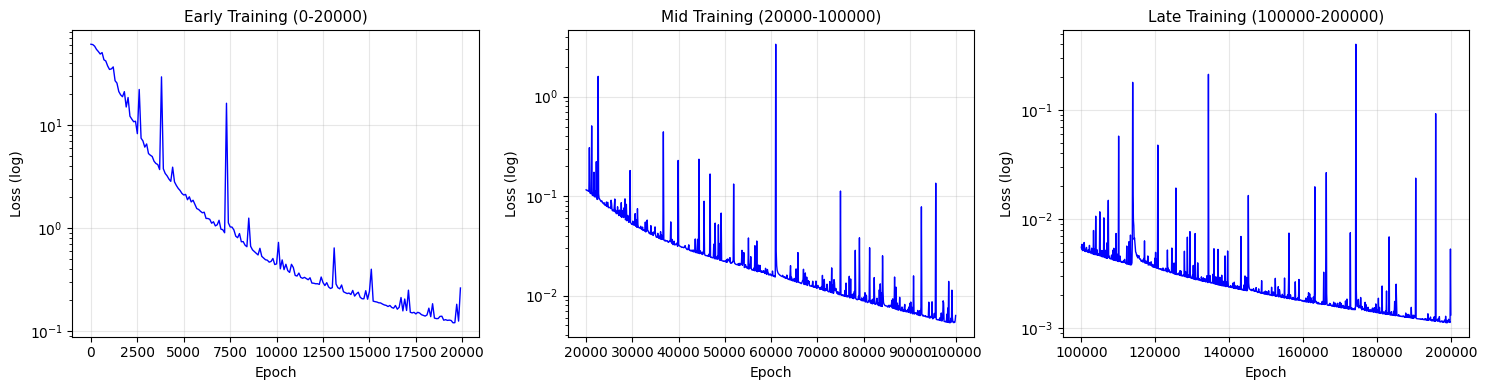


Loss at key epochs:
  Epoch      0 (  0.0%): loss = 6.063921e+01
  Epoch  20000 ( 10.0%): loss = 1.154763e-01
  Epoch  50000 ( 25.0%): loss = 2.209065e-02
  Epoch 100000 ( 50.0%): loss = 5.515357e-03
  Epoch 150000 ( 75.0%): loss = 2.039118e-03
  Epoch 200000 (100.0%): loss = 1.319520e-03


In [6]:
# Plot 4: Loss trajectory in different phases
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Early training (first 10%)
early_cutoff = int(len(loss_epochs) * 0.1)
axes[0].semilogy(loss_epochs[:early_cutoff], losses[:early_cutoff], "b-", linewidth=1)
axes[0].set_title(f"Early Training (0-{loss_epochs[early_cutoff]:.0f})", fontsize=11)
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss (log)")
axes[0].grid(True, alpha=0.3)

# Middle training (10-50%)
mid_start = int(len(loss_epochs) * 0.1)
mid_end = int(len(loss_epochs) * 0.5)
axes[1].semilogy(
    loss_epochs[mid_start:mid_end], losses[mid_start:mid_end], "b-", linewidth=1
)
axes[1].set_title(
    f"Mid Training ({loss_epochs[mid_start]:.0f}-{loss_epochs[mid_end]:.0f})",
    fontsize=11,
)
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss (log)")
axes[1].grid(True, alpha=0.3)

# Late training (last 50%)
late_start = int(len(loss_epochs) * 0.5)
axes[2].semilogy(loss_epochs[late_start:], losses[late_start:], "b-", linewidth=1)
axes[2].set_title(
    f"Late Training ({loss_epochs[late_start]:.0f}-{loss_epochs[-1]:.0f})", fontsize=11
)
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Loss (log)")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("loss_phases.png", dpi=150)
plt.show()

# Print loss at key epochs
print("\nLoss at key epochs:")
for frac in [0.0, 0.1, 0.25, 0.5, 0.75, 1.0]:
    idx = min(int(frac * (len(losses) - 1)), len(losses) - 1)
    print(
        f"  Epoch {loss_epochs[idx]:6.0f} ({frac * 100:5.1f}%): loss = {losses[idx]:.6e}"
    )

In [7]:
# Summary statistics and analysis
print("=" * 70)
print("TRAINING SUMMARY")
print("=" * 70)

print(f"\nConfiguration:")
print(f"  Task: Y = X @ W where W has rank {results['rank']}")
print(f"  Network: {results['depth']}-layer ReLU MLP, dim={results['dim']}")
print(f"  Data: {results['n_samples']} samples")

print(f"\nTraining:")
print(f"  Total epochs: {results['epochs']:,}")
print(f"  Learning rate: {results['lr']}")

print(f"\nLoss:")
print(f"  Initial (baseline): {results['baseline_loss']:.4f}")
print(f"  Final: {results['best_final_loss']:.6e}")
print(f"  Minimum achieved: {min_loss:.6e} at epoch {min_loss_epoch}")
print(
    f"  Total reduction: {results['baseline_loss'] / results['best_final_loss']:.1e}x"
)

if "erank_history" in results:
    print(f"\nEffective Rank of Gram Matrix K=Phi(X)@Phi(X).T:")
    print(f"  Initial: {results['initial_erank']:.4f}")
    print(f"  Final: {results['final_erank']:.4f}")
    print(f"  Change: {results['final_erank'] - results['initial_erank']:+.4f}")
    print(f"  Range during training: [{min(eranks):.4f}, {max(eranks):.4f}]")
    print(f"  Std dev: {np.std(eranks):.4f}")

    print(f"\nAnalysis:")
    if np.std(eranks) < 0.1:
        print(f"  WARNING: Effective rank is nearly constant (~{np.mean(eranks):.2f})")
        print(f"  This suggests the network may be in a 'lazy training' regime")
        print(f"  where mostly the last layer is being updated.")

    if results["final_erank"] < results["rank"] / 2:
        print(
            f"  NOTE: Erank ({results['final_erank']:.2f}) << Task rank ({results['rank']})"
        )
        print(
            f"  The learned representation has much lower dimensionality than the task."
        )

print("\n" + "=" * 70)

TRAINING SUMMARY

Configuration:
  Task: Y = X @ W where W has rank 32
  Network: 48-layer ReLU MLP, dim=64
  Data: 128 samples

Training:
  Total epochs: 200,000
  Learning rate: 0.0002

Loss:
  Initial (baseline): 60.6350
  Final: 1.319520e-03
  Minimum achieved: 1.117551e-03 at epoch 199000
  Total reduction: 4.6e+04x

Effective Rank of Gram Matrix K=Phi(X)@Phi(X).T:
  Initial: 1.0769
  Final: 3.6761
  Change: +2.5993
  Range during training: [1.0769, 3.6761]
  Std dev: 0.3977

Analysis:
  NOTE: Erank (3.68) << Task rank (32)
  The learned representation has much lower dimensionality than the task.

